In [2]:
import pandas as pd
#pyspark.SparkConf
#pyspark.SparkConf 类提供了对一个 Spark 应用程序配置的操作方法。用于将各种Spark参数设置为键值对。
#pyspark.SparkContext 类提供了应用与 Spark 交互的主入口点，表示应用与 Spark 集群的连接，基于这个连接，应用可以在该集群上创建 RDD 和 广播变量 (pyspark.Broadcast)
from pyspark import SparkContext,SparkConf

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import pandas as pd
pd.options.display.mpl_style='default'

In [13]:
X[0:10]

array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108]])

In [14]:
y[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

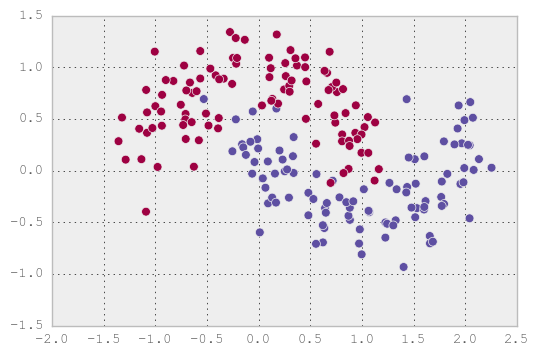

In [16]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)    

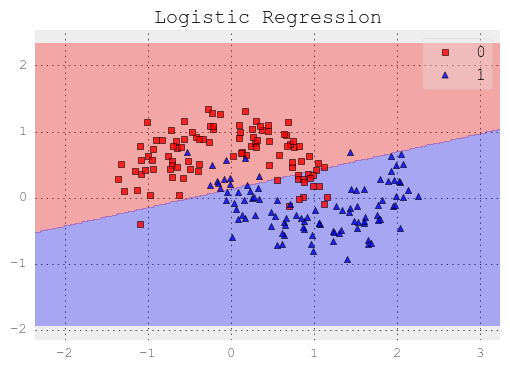

In [18]:
# # Train the logistic rgeression classifier  
clf = sklearn.linear_model.LogisticRegressionCV()  
clf.fit(X, y)  
# # Plot the decision boundary  
plot_decision_regions(X,y,clf.fit(X,y),legend=1) #legend=0表示没有图例，看函数说明  
plt.title("Logistic Regression")  
plt.show()

In [29]:
#－－－－－－－－－－－－－－－－－－－－－－－－－－－  
#BP  
#定义梯度下降一些有用的变量和参数  
num_examples = len(X) # training set size  
nn_input_dim = 2 # input layer dimensionality  
nn_output_dim = 2 # output layer dimensionality  
# Gradient descent parameters (I picked these by hand)  
epsilon = 0.01 # learning rate for gradient descent  
reg_lambda = 0.01 # regularization strength  
class tempmodel():  
    model={}  
    # Helper function to evaluate the total loss on the dataset  
    def calculate_loss(self):  
        W1, b1, W2, b2 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2']  
        # Forward propagation to calculate our predictions  
        z1 = X.dot(W1) + b1  
        a1 = np.tanh(z1)  
        z2 = a1.dot(W2) + b2  
        exp_scores = np.exp(z2)  
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  
        # Calculating the loss  
        corect_logprobs = -np.log(probs[range(num_examples), y])  
        data_loss = np.sum(corect_logprobs)  
        # Add regulatization term to loss (optional)  
        data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))  
        return 1./num_examples * data_loss  
    # Helper function to predict an output (0 or 1)  
    def predict(self, X): #这个‘X’大小写都无所谓，因为，predict是函数plot_decision_regions自己调用的，会自动以第一个函数传入给‘X’  
        W1, b1, W2, b2 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2']  
        # Forward propagation  
        z1 = X.dot(W1) + b1  
        a1 = np.tanh(z1)  
        z2 = a1.dot(W2) + b2  
        exp_scores = np.exp(z2)  
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  
        return np.argmax(probs, axis=1)  
    # This function learns parameters for the neural network and returns the model.  
    # - nn_hdim: Number of nodes in the hidden layer  
    # - num_passes: Number of passes through the training data for gradient descent  
    # - print_loss: If True, print the loss every 1000 iterations  
    def build_model(self,nn_hdim, num_passes=20000, print_loss=False):  
        # Initialize the parameters to random values. We need to learn these.  
        np.random.seed(0)  
        W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)  
        b1 = np.zeros((1, nn_hdim))  
        W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)  
        b2 = np.zeros((1, nn_output_dim))  
        # This is what we return at the end  
        model = {}  
        # Gradient descent. For each batch...  
        for i in range(0, num_passes):  
            # Forward propagation  
            z1 = X.dot(W1) + b1  
            a1 = np.tanh(z1)  
            z2 = a1.dot(W2) + b2  
            exp_scores = np.exp(z2)  
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  
            # Backpropagation  
            delta3 = probs  
            delta3[range(num_examples), y] -= 1  
            dW2 = (a1.T).dot(delta3)  
            db2 = np.sum(delta3, axis=0, keepdims=True)  
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))  
            dW1 = np.dot(X.T, delta2)  
            db1 = np.sum(delta2, axis=0)  
            # Add regularization terms (b1 and b2 don't have regularization terms)  
            dW2 += reg_lambda * W2  
            dW1 += reg_lambda * W1  
            # Gradient descent parameter update  
            W1 += -epsilon * dW1  
            b1 += -epsilon * db1  
            W2 += -epsilon * dW2  
            b2 += -epsilon * db2  
            # Assign new parameters to the model  
            self.model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}  
            # Optionally print the loss.  
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.  
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" %(i, self.calculate_loss()))

please input the number of hidden layer4
Loss after iteration 0: 0.466461
Loss after iteration 1000: 0.066685
Loss after iteration 2000: 0.060111
Loss after iteration 3000: 0.057099
Loss after iteration 4000: 0.055831
Loss after iteration 5000: 0.055171
Loss after iteration 6000: 0.054800
Loss after iteration 7000: 0.050477
Loss after iteration 8000: 0.067676
Loss after iteration 9000: 0.068825
Loss after iteration 10000: 0.050175
Loss after iteration 11000: 0.053357
Loss after iteration 12000: 0.073948
Loss after iteration 13000: 0.060661
Loss after iteration 14000: 0.050409
Loss after iteration 15000: 0.050124
Loss after iteration 16000: 0.050258
Loss after iteration 17000: 0.067561
Loss after iteration 18000: 0.050188
Loss after iteration 19000: 0.050180


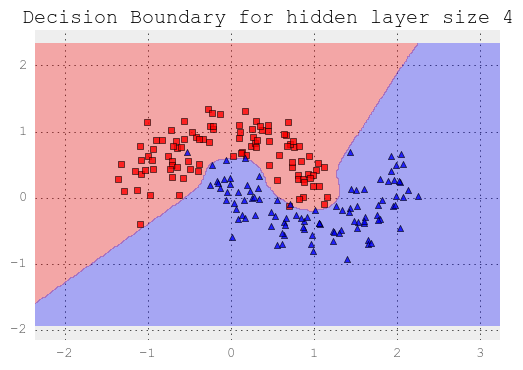

In [30]:
if __name__=='__main__':  
    input_degree=int(input('please input the number of hidden layer'))
    try:  
        if input_degree<2:  
            degree=3  
        else:  
            #degree=int(sys.argv[1])  
            degree=input_degree
    except:  
        print("usage:python 2BP.py degree(a number,default equal to 3)"  )
        sys.exit(0)  
    rmodel=tempmodel()  
    # Build a model with a 3-dimensional hidden layer  
    rmodel.build_model(degree,print_loss=True)  
    # Plot the decision boundary  
    plot_decision_regions(X,y,rmodel,legend=0) #必须改成类模式，因为这个函数要求传入的对象有predict函数  
    plt.title("Decision Boundary for hidden layer size %d"%degree)  
    plt.show()  